Enter value for m :1.6545454545454545
Enter value for c :0.6545454545454547


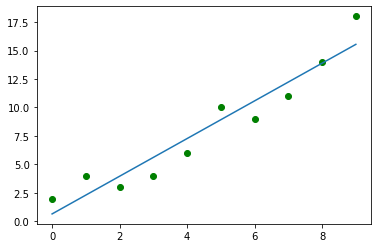

In [17]:
import matplotlib.pyplot as plt

x =[i for i in range(10)]
y =[2,4,3,4,6,10,9,11,14,18]

m=float(input('Enter value for m :'))
c=float(input('Enter value for c :'))
a=m*0+c
b=m*9+c

plt.scatter(x, y, c='green')
plt.plot([0,9],[a,b])

plt.show()

In [8]:
x =[i for i in range(10)]
y =[2,4,3,4,6,10,9,11,14,18]

In [10]:
n=len(x)
n

10

In [11]:
sum_xy=sum([i*j for i,j in zip(x,y)])
sum_xy

501

In [12]:
sum_x=sum(x)
sum_x

45

In [13]:
sum_y=sum(y)
sum_y

81

In [14]:
sum_xx=sum([i**2 for i in x])
sum_xx

285

In [15]:
m=(n*sum_xy-sum_x*sum_y)/(n*sum_xx-sum_x**2)
m

1.6545454545454545

In [16]:
c=(sum_y-m*sum_x)/n
c

0.6545454545454547

In [20]:
pred=m*float(input('Enter  the value for x'))+c
pred

Enter  the value for x2


3.963636363636364

In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv('./Fish.csv')
df = data.copy()
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
155,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792
129,Pike,300.0,31.7,34.0,37.8,5.7078,4.1580
113,Perch,700.0,34.0,36.0,38.3,10.6091,6.7408
97,Perch,145.0,22.0,24.0,25.5,6.3750,3.8250
57,Whitefish,306.0,25.6,28.0,30.8,8.7780,4.6816
118,Perch,820.0,36.6,39.0,41.3,12.4313,7.3514
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
48,Roach,169.0,22.0,24.0,27.2,7.5344,3.8352
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044


**Meanings of the Columns:**
* Species: Species name of fish
* Weight: Weight of fish in gram
* Length1: Vertical length in cm
* Length2: Diagonal length in cm
* Length3: Cross length in cm
* Height: Height in cm
* Width: Diagonal width in cm

In [24]:
df.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
df.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
Species      156 non-null object
Weight       156 non-null float64
LengthVer    156 non-null float64
LengthDia    156 non-null float64
LengthCro    156 non-null float64
Height       156 non-null float64
Width        156 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.7+ KB


In [26]:
print(str('NaN value in the dataset: '), df.isnull().values.any())

NaN value in the dataset:  False


In [28]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp

,Species
Perch,56
Bream,35
Roach,20
Pike,14
Smelt,14
Parkki,11
Whitefish,6


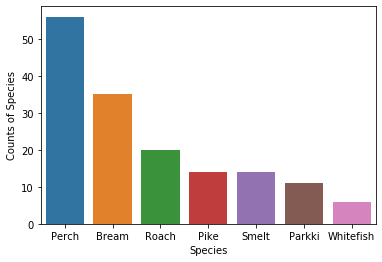

In [29]:
sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

In [30]:
y = df['Weight']
X = df.iloc[:,2:7]
X

,LengthVer,LengthDia,LengthCro,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
151,11.5,12.2,13.4,2.0904,1.3936
152,11.7,12.4,13.5,2.4300,1.2690
153,12.1,13.0,13.8,2.2770,1.2558
154,13.2,14.3,15.2,2.8728,2.0672


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [34]:
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score

In [36]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -494.4408572188626
Model coefficients:  [ 62.41527657  -7.41179795 -31.06023916  26.90956775  42.23999841]


In [38]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')

y = -494.44 + 62.42*X1 -7.41*X2 -31.06*X3 + 26.91*X4 + 42.24*X5


In [47]:
y = -494.44 + 62.42*float(input('X1 - ')) -7.41*float(input('X2 - ')) -31.06*float(input('X3 - ')) + 26.91*float(input('X4 - ')) + 42.24*float(input('X5 - '))

X1 - 26.3
X2 - 29
X3 - 33.5
X4 - 12.73
X5 - 4.45


In [48]:
y

422.3383000000002

In [39]:
y_head = reg.predict(X_train)

In [40]:
r2_score(y_train, y_head)

0.8888919014691642

In [23]:
y_pred = reg.predict(X_test)

In [24]:
print(r2_score(y_test, y_pred))

0.8542092608109686


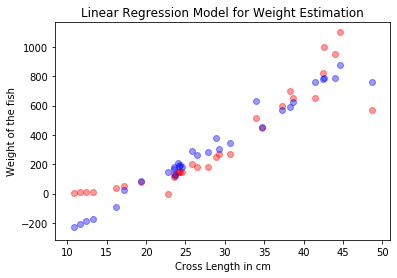

In [25]:
plt.scatter(X_test['LengthCro'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['LengthCro'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

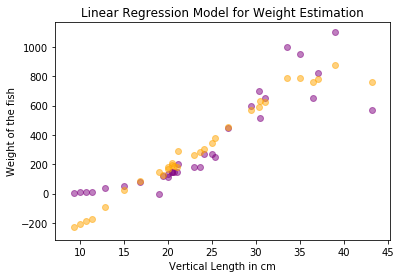

In [26]:
plt.scatter(X_test['LengthVer'], y_test, color='purple', alpha=0.5)
plt.scatter(X_test['LengthVer'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

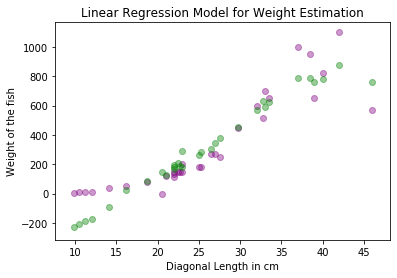

In [27]:
plt.scatter(X_test['LengthDia'], y_test, color='purple', alpha=0.4)
plt.scatter(X_test['LengthDia'], y_pred, color='green', alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');